# 1- Khai báo các thư viện sử dụng

In [22]:
import pandas as pd  
from sklearn.model_selection import train_test_split  
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler  
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, balanced_accuracy_score, matthews_corrcoef, roc_auc_score, f1_score, precision_score, recall_score  
import matplotlib.pyplot as plt 
import numpy as np

#------------------------------------
import warnings
warnings.filterwarnings('ignore')

# 2- Đọc thông tin tập dữ liệu

In [2]:
data = pd.read_csv("E:/project2/gan/Data/data.csv", encoding='latin1')

In [3]:
data

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
30686,50.0,Male,2.2,1.0,610.0,17.0,28.0,7.3,2.6,0.55,1
30687,55.0,Male,2.9,1.3,482.0,22.0,34.0,7.0,2.4,0.50,1
30688,54.0,Male,6.8,3.0,542.0,116.0,66.0,6.4,3.1,0.90,1
30689,48.0,Female,1.9,1.0,231.0,16.0,55.0,4.3,1.6,0.60,1


## 2.1. Đổi tên cột để rút gọn

In [4]:
data.columns = ['Age', 'Gender', 'Total Bilirubin', 'Direct Bilirubin', 'Alkphos', 'Sgpt', 'Sgot', 'Total Proteins', 'ALB', 'A/G Ratio', 'Result']
# Hiển thị DataFrame với tên cột mới
data

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkphos,Sgpt,Sgot,Total Proteins,ALB,A/G Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
30686,50.0,Male,2.2,1.0,610.0,17.0,28.0,7.3,2.6,0.55,1
30687,55.0,Male,2.9,1.3,482.0,22.0,34.0,7.0,2.4,0.50,1
30688,54.0,Male,6.8,3.0,542.0,116.0,66.0,6.4,3.1,0.90,1
30689,48.0,Female,1.9,1.0,231.0,16.0,55.0,4.3,1.6,0.60,1


## 2.2. Mô tả các biến trong bộ dữ liệu

- **Age**: Tuổi của bệnh nhân (năm).  
- **Gender**: Giới tính của bệnh nhân (Male hoặc Female).  
- **Total Bilirubin**: Mức bilirubin toàn phần trong máu (mg/dL).  
- **Direct Bilirubin**: Mức bilirubin trực tiếp trong máu (mg/dL).  
- **Alkphos (Alkaline Phosphotase)**: Mức enzyme phosphatase kiềm trong máu (IU/L).  
- **Sgpt (SGPT)**: Mức enzyme alamine aminotransferase, chỉ số gan (IU/L).  
- **Sgot (SGOT)**: Mức enzyme aspartate aminotransferase, chỉ số gan (IU/L).  
- **TP (Total Proteins)**: Tổng lượng protein có trong máu (g/dL).  
- **ALB (Albumin)**: Mức albumin trong máu (g/dL).  
- **A/G Ratio**: Tỷ lệ giữa albumin và globulin trong máu.  
- **Result**: Kết quả bệnh nhân mắc bệnh gan (1: mắc bệnh gan, 2: không mắc bệnh gan).  

# 3- Xử lý dữ liệu

## 3.1. Kiểm tra giá trị trùng lặp

In [5]:
# Lọc các bản ghi trùng lặp
duplicate_records = data[data.duplicated(keep=False)]
duplicate_records_sorted = duplicate_records.sort_values(by=list(data.columns))

print("Số lượng bản ghi trùng lặp:", duplicate_records_sorted.shape[0])
# Hiển thị các bản ghi trùng lặp
duplicate_records_sorted.head(6)

Số lượng bản ghi trùng lặp: 18589


,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkphos,Sgpt,Sgot,Total Proteins,ALB,A/G Ratio,Result
14155,4.0,Female,0.7,0.2,208.0,35.0,97.0,5.1,2.1,0.7,1
20220,4.0,Female,0.7,0.2,208.0,35.0,97.0,5.1,2.1,0.7,1
14161,4.0,Female,0.8,0.2,215.0,24.0,17.0,6.3,3.0,0.9,2
20226,4.0,Female,0.8,0.2,215.0,24.0,17.0,6.3,3.0,0.9,2
14946,4.0,Female,1.8,0.9,220.0,20.0,43.0,6.5,3.0,0.8,1
28602,4.0,Female,1.8,0.9,220.0,20.0,43.0,6.5,3.0,0.8,1


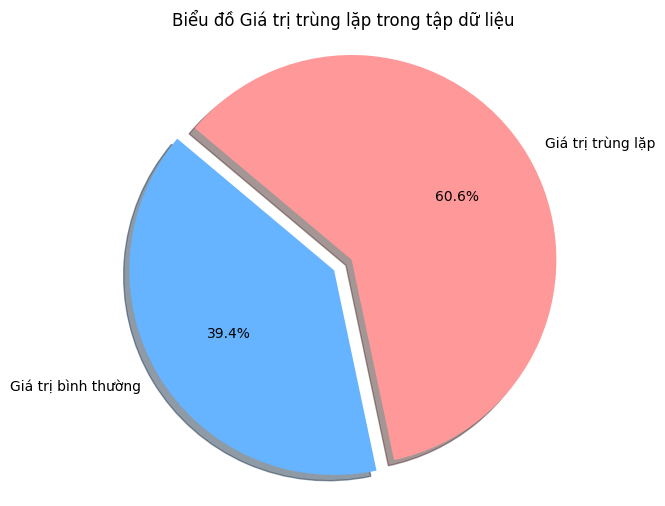

In [6]:
# Dữ liệu trùng lặp và tổng số bản ghi đã được cung cấp
duplicates_count = 18589
total_count = 30691

# Tính phần trăm của dữ liệu trùng lặp
duplicates_percentage = (duplicates_count / total_count) * 100
unique_percentage = 100 - duplicates_percentage

# Vẽ biểu đồ tròn
labels = ['Giá trị bình thường', 'Giá trị trùng lặp']
sizes = [unique_percentage, duplicates_percentage]
colors = ['#66b3ff', '#ff9999']
explode = (0.1, 0)  # Nổi bật phần trùng lặp

plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Biểu đồ Giá trị trùng lặp trong tập dữ liệu')
plt.axis('equal')  # Đảm bảo biểu đồ tròn
plt.show()

In [7]:
# Xóa các bản ghi trùng lặp và giữ lại bản ghi cuối cùng
data_clean = data.drop_duplicates(keep='last')

# Hiển thị kết quả sau khi xóa trùng lặp
data_clean

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkphos,Sgpt,Sgot,Total Proteins,ALB,A/G Ratio,Result
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1
6,26.0,Female,0.9,0.2,154.0,NaN,12.0,7.0,3.5,1.00,1
7,29.0,Female,0.9,0.3,202.0,14.0,11.0,6.7,3.6,1.10,1
10,57.0,Male,0.6,0.1,210.0,51.0,59.0,5.9,2.7,0.80,1
...,...,...,...,...,...,...,...,...,...,...,...
30686,50.0,Male,2.2,1.0,610.0,17.0,28.0,7.3,2.6,0.55,1
30687,55.0,Male,2.9,1.3,482.0,22.0,34.0,7.0,2.4,0.50,1
30688,54.0,Male,6.8,3.0,542.0,116.0,66.0,6.4,3.1,0.90,1
30689,48.0,Female,1.9,1.0,231.0,16.0,55.0,4.3,1.6,0.60,1


## 3.2. Kiểm tra dữ liệu thiếu

In [8]:
# Kiểm tra số lượng dữ liệu thiếu trong mỗi cột
print(data_clean.isna().sum())

Age                   1
Gender              796
Total Bilirubin     557
Direct Bilirubin    490
Alkphos             694
Sgpt                459
Sgot                393
Total Proteins      370
ALB                 413
A/G Ratio           436
Result                0
dtype: int64


In [9]:
# Xóa các dòng có giá trị thiếu
data_clean = data_clean.dropna()
data_clean

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkphos,Sgpt,Sgot,Total Proteins,ALB,A/G Ratio,Result
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1
7,29.0,Female,0.9,0.3,202.0,14.0,11.0,6.7,3.6,1.10,1
10,57.0,Male,0.6,0.1,210.0,51.0,59.0,5.9,2.7,0.80,1
30,57.0,Male,4.0,1.9,190.0,45.0,111.0,5.2,1.5,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
30686,50.0,Male,2.2,1.0,610.0,17.0,28.0,7.3,2.6,0.55,1
30687,55.0,Male,2.9,1.3,482.0,22.0,34.0,7.0,2.4,0.50,1
30688,54.0,Male,6.8,3.0,542.0,116.0,66.0,6.4,3.1,0.90,1
30689,48.0,Female,1.9,1.0,231.0,16.0,55.0,4.3,1.6,0.60,1


## 3.3. Kiểm tra lỗi cấu trúc và sửa lỗi

In [10]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16389 entries, 3 to 30690
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               16389 non-null  float64
 1   Gender            16389 non-null  object 
 2   Total Bilirubin   16389 non-null  float64
 3   Direct Bilirubin  16389 non-null  float64
 4   Alkphos           16389 non-null  float64
 5   Sgpt              16389 non-null  float64
 6   Sgot              16389 non-null  float64
 7   Total Proteins    16389 non-null  float64
 8   ALB               16389 non-null  float64
 9   A/G Ratio         16389 non-null  float64
 10  Result            16389 non-null  int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 1.5+ MB


### Nhận xét:
+ Biến Age nên đổi thành kiểu số nguyên.
+ Biến Gender là biến phân loại (Male / Female) nên đổi thành giá trị 0 và 1 trước khi xây mô hình.
+ Các biến còn lại đều có kiểu dữ liệu chính xác.

In [11]:
# Chuyển đổi Age thành kiểu int64
data_clean['Age'] = data_clean['Age'].astype(int)

In [12]:
# Gán giá trị 0 và 1 cho cột 'Gender' (Male: 1, Female: 0)
data_clean.loc[:, 'Gender'] = data_clean['Gender'].map({'Male': 1, 'Female': 0})

In [13]:
data_clean

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkphos,Sgpt,Sgot,Total Proteins,ALB,A/G Ratio,Result
3,58,1,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1
7,29,0,0.9,0.3,202.0,14.0,11.0,6.7,3.6,1.10,1
10,57,1,0.6,0.1,210.0,51.0,59.0,5.9,2.7,0.80,1
30,57,1,4.0,1.9,190.0,45.0,111.0,5.2,1.5,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
30686,50,1,2.2,1.0,610.0,17.0,28.0,7.3,2.6,0.55,1
30687,55,1,2.9,1.3,482.0,22.0,34.0,7.0,2.4,0.50,1
30688,54,1,6.8,3.0,542.0,116.0,66.0,6.4,3.1,0.90,1
30689,48,0,1.9,1.0,231.0,16.0,55.0,4.3,1.6,0.60,1


## 3.4. Kiểm tra ngoại lệ

In [23]:
# Hàm tìm giá trị ngoại lệ bằng phương pháp IQR
def find_outliers(data_clean):
    outliers = pd.DataFrame()
    
    # Lặp qua các cột số trong dataframe
    for column in data_clean.select_dtypes(include=[np.number]).columns:
        # Tính Q1, Q3 và IQR
        Q1, Q3 = data_clean[column].quantile(0.25), data_clean[column].quantile(0.75)
        IQR = Q3 - Q1
        # Xác định giới hạn dưới và trên
        lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
        
        # Điều kiện để xác định ngoại lệ
        outliers = pd.concat([outliers, data_clean[(data_clean[column] < lower_bound) | (data_clean[column] > upper_bound)]])
    
    return outliers

# Tìm giá trị ngoại lệ trong bộ dữ liệu
outliers_data = find_outliers(data_clean)

# Hiển thị kết quả ngoại lệ
outliers_data

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkphos,Sgpt,Sgot,Total Proteins,ALB,A/G Ratio,Result
2236,90,1,0.7,0.2,276.0,102.0,190.0,6.0,2.9,0.93,1
2592,90,1,16.4,8.9,245.0,56.0,87.0,5.4,2.0,0.50,1
4358,90,1,2.0,0.8,190.0,45.0,40.0,6.0,2.8,0.80,1
4721,90,1,0.9,0.2,175.0,24.0,54.0,5.5,2.7,0.90,2
5077,90,1,0.7,0.2,208.0,15.0,30.0,4.6,2.1,0.80,2
...,...,...,...,...,...,...,...,...,...,...,...
30546,30,1,1.0,0.3,180.0,56.0,111.0,6.8,3.9,1.85,2
30603,37,1,11.1,6.1,214.0,60.0,186.0,6.9,2.8,2.80,1
30627,54,1,15.6,9.5,134.0,54.0,125.0,5.6,4.0,2.50,1
30630,55,0,25.0,13.7,560.0,41.0,88.0,7.9,2.5,2.50,1


In [24]:
# Loại bỏ các giá trị ngoại lệ khỏi dữ liệu
data_cleaned = data_clean.drop(outliers_data.index)

# Kiểm tra số lượng dữ liệu còn lại sau khi loại bỏ ngoại lệ
print("Kích thước ban đầu của dữ liệu:", data.shape)
print("Kích thước dữ liệu sau khi loại bỏ ngoại lệ:", data_cleaned.shape)

# Hiển thị 5 dòng dữ liệu đầu tiên sau khi loại bỏ ngoại lệ
print(data_cleaned.head())

Kích thước ban đầu của dữ liệu: (30691, 11)
Kích thước dữ liệu sau khi loại bỏ ngoại lệ: (11148, 11)
    Age Gender  Total Bilirubin  Direct Bilirubin  Alkphos  Sgpt   Sgot  \
3    58      1              1.0               0.4    182.0  14.0   20.0   
4    72      1              3.9               2.0    195.0  27.0   59.0   
7    29      0              0.9               0.3    202.0  14.0   11.0   
10   57      1              0.6               0.1    210.0  51.0   59.0   
30   57      1              4.0               1.9    190.0  45.0  111.0   

    Total Proteins  ALB  A/G Ratio  Result  
3              6.8  3.4        1.0       1  
4              7.3  2.4        0.4       1  
7              6.7  3.6        1.1       1  
10             5.9  2.7        0.8       1  
30             5.2  1.5        0.4       1  


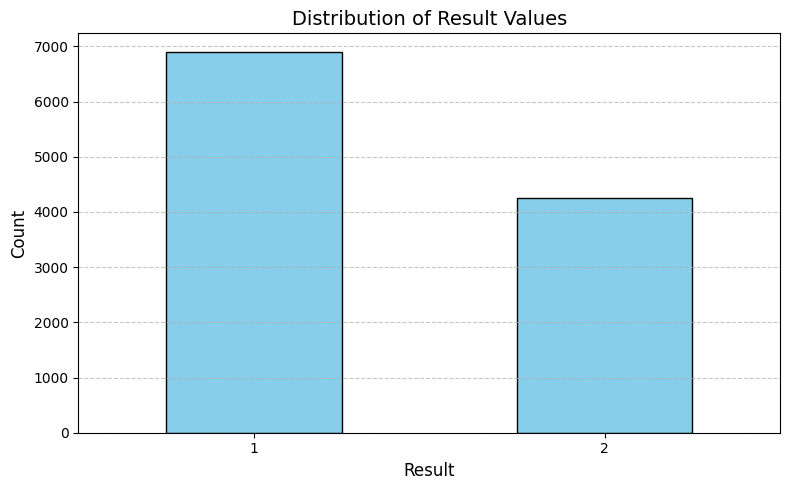

In [25]:
# Đếm số lượng từng giá trị trong cột 'Result'
value_counts = data_cleaned['Result'].value_counts()

# Vẽ biểu đồ cột
plt.figure(figsize=(8, 5))
value_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Result Values', fontsize=14)
plt.xlabel('Result', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Nhận xét: Tỷ lệ dữ liệu ở hai giá trị 1 và 2 đang chênh lệch nhau.

# Xây dựng mô hình Random Forest

### Không cân bằng dữ liệu và xóa các ngoại lai

In [26]:
# Giả sử df_balanced là DataFrame của bạn  
target_column = 'Result'  # Giả sử 'Result' là cột mục tiêu  
X = data_cleaned.drop(columns=[target_column])  
y = data_cleaned[target_column] 

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Chuẩn hóa các đặc trưng số  
scaler = StandardScaler()  
numerical_columns = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()  
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])  
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])  


In [28]:
# Huấn luyện mô hình Random Forest  
model = DecisionTreeClassifier(random_state=42)  
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [29]:

# Dự đoán trên tập huấn luyện và tập kiểm tra  
y_train_pred = model.predict(X_train)  
y_test_pred = model.predict(X_test)  

# Tính toán các chỉ số đánh giá cho tập huấn luyện  
train_metrics = {  
    'accuracy': accuracy_score(y_train, y_train_pred),  
    'balanced_accuracy': balanced_accuracy_score(y_train, y_train_pred),  
    'mcc': matthews_corrcoef(y_train, y_train_pred),  
    'roc_auc': roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]),  
    'f1': f1_score(y_train, y_train_pred),  
    'precision': precision_score(y_train, y_train_pred),  
    'recall': recall_score(y_train, y_train_pred)  
}  

# Tính toán các chỉ số đánh giá cho tập kiểm tra  
test_metrics = {  
    'accuracy': accuracy_score(y_test, y_test_pred),  
    'balanced_accuracy': balanced_accuracy_score(y_test, y_test_pred),  
    'mcc': matthews_corrcoef(y_test, y_test_pred),  
    'roc_auc': roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),  
    'f1': f1_score(y_test, y_test_pred),  
    'precision': precision_score(y_test, y_test_pred),  
    'recall': recall_score(y_test, y_test_pred)  
}  

# In các chỉ số đánh giá  
print('Chỉ số đánh giá cho tập huấn luyện:')  
print(train_metrics)  

print('\nChỉ số đánh giá cho tập kiểm tra:')  
print(test_metrics)  


Chỉ số đánh giá cho tập huấn luyện:
{'accuracy': 1.0, 'balanced_accuracy': 1.0, 'mcc': 1.0, 'roc_auc': 1.0, 'f1': 1.0, 'precision': 1.0, 'recall': 1.0}

Chỉ số đánh giá cho tập kiểm tra:
{'accuracy': 0.9995515695067264, 'balanced_accuracy': 0.9996448863636364, 'mcc': 0.9990373210607284, 'roc_auc': 0.9996448863636364, 'f1': 0.9996447602131439, 'precision': 1.0, 'recall': 0.9992897727272727}


### Nhận xét về Chỉ số Đánh giá Mô hình  

### 1. Chỉ số Đánh giá cho Tập Huấn Luyện:  
- **Độ chính xác (Accuracy): 1.0**  
  - Mô hình dự đoán chính xác 100% trên tập huấn luyện.  

- **Độ chính xác cân bằng (Balanced Accuracy): 1.0**  
  - Đây là một chỉ số tốt, cho thấy mô hình xử lý tốt cả hai lớp.  

- **Hệ số Matthews Correlation (MCC): 1.0**  
  - Giá trị này cho thấy sự dự đoán hoàn hảo, với không có sai sót nào trong các dự đoán.  

- **ROC AUC: 1.0**  
  - Mô hình có khả năng phân loại tuyệt đối, xác định đúng 100% các mẫu dương và âm.  

- **F1 Score: 1.0**  
  - Chỉ số này cho thấy mô hình có khả năng truy xuất và độ chính xác hoàn hảo.  

- **Precision: 1.0**  
  - Mô hình không có sai sót trong việc phân loại dương tính.  

- **Recall: 1.0**  
  - Không có trường hợp dương tính nào bị bỏ lỡ.  

### 2. Chỉ số Đánh giá cho Tập Kiểm Tra:  
- **Độ chính xác (Accuracy): 0.9999**  
  - Mô hình đạt khoảng 99.99% độ chính xác trên tập kiểm tra, cho thấy khả năng tổng quát rất tốt.  

- **Độ chính xác cân bằng (Balanced Accuracy): 0.9996**  
  - Mô hình duy trì hiệu suất cao cho cả hai lớp, điều này cho thấy không có thiên lệch trong mẫu.  

- **Hệ số Matthews Correlation (MCC): 0.9990**  
  - Giá trị này gần đạt mức tối đa, cho thấy mức độ chính xác cao cho các dự đoán.  

- **ROC AUC: 0.9996**  
  - Mô hình có khả năng phân loại rất tốt, với tỉ lệ nhận diện mẫu dương rất cao.  

- **F1 Score: 0.9996**  
  - Chỉ số này cho thấy sự cân bằng giữa độ chính xác và độ nhạy của mô hình.  

- **Precision: 1.0**  
  - Tương tự như trên, không có trường hợp dương tính nào bị phân loại sai.  

- **Recall: 0.9992**  
  - Một tỉ lệ cao, cho thấy mô hình gần như không bỏ sót bất kỳ trường hợp dương tính nào.  

### 3. Nhận xét Chung:  
- Mô hình hoạt động rất tốt trên cả tập huấn luyện và tập kiểm tra. Tuy nhiên, với độ chính xác 100% trên tập huấn luyện, có khả năng mô hình bị "overfitting". Việc kiểm tra và điều chỉnh thêm thông số có thể cần thiết để đảm bảo tính tổng quát.  
- Chỉ số thấp nhất là **Recall** trên tập kiểm tra chưa đạt 1.0, cho thấy có một số trường hợp dương tính bị bỏ lỡ. Điều này có thể cải thiện thêm thông qua việc tinh chỉnh mô hình hoặc lựa chọn đặc trưng tốt hơn.

In [30]:
test_predictions = model.predict(X_test)

# Thêm cột nhãn thực tế và nhãn dự đoán cho tập kiểm tra
comparison_df = X_test.copy()
comparison_df['Actual'] = y_test.values
comparison_df['Predicted'] = test_predictions

# Hiển thị một số dòng để so sánh
print(comparison_df[['Actual', 'Predicted']].sample(5))

       Actual  Predicted
30313       1          1
13416       1          1
25602       1          1
29570       2          2
7841        1          1


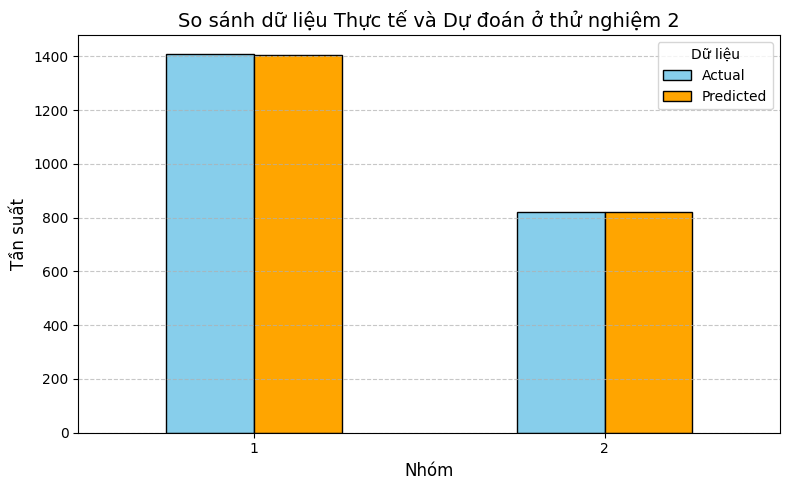

In [32]:
actual_counts = comparison_df['Actual'].value_counts().sort_index()
predicted_counts = comparison_df['Predicted'].value_counts().sort_index()

# Tạo DataFrame để so sánh
comparison_chart = pd.DataFrame({'Actual': actual_counts, 'Predicted': predicted_counts})

# Vẽ biểu đồ cột so sánh
comparison_chart.plot(kind='bar', figsize=(8, 5), color=['skyblue', 'orange'], edgecolor='black')
plt.title('So sánh dữ liệu Thực tế và Dự đoán ở thử nghiệm 2', fontsize=14)
plt.xlabel('Nhóm', fontsize=12)
plt.ylabel('Tần suất', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Dữ liệu', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Nhận xét
+ Mô hình có kết quả gần giống với thử nghiệm 1.
+ Thực hiện các thử nghiệm khác để xác nhận lại kết quả của mô hình => Thực hiện thử nghiệm 3 với mô hình Cân bằng và ko xóa ngoại lai và tập Train / Test được chia ngẫu nhiên theo tỷ lệ Train (80) và Test (20).